## Rysowanie krzywej ROC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *

In [2]:
def prec_score_10(y_true, y_pred):
    Y = pd.DataFrame({"y_pred": y_pred, "y_true": y_true})
    n = int(np.floor(y_pred.shape[0]*0.1)+1)
    Y = Y.sort_values("y_pred", ascending=False).head(n)
    return Y["y_true"].mean(), roc_auc_score(y_true, y_pred)

def calculate_scores(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return acc, recall, precision

In [3]:
y_true = pd.read_csv("y_true.csv").iloc[:, 0]
rf_results = pd.read_csv("rf_results.csv")
xgb_results = pd.read_csv("xgb_results.csv")
lgb_results = pd.read_csv("lgb_results.csv")
cat_results = pd.read_csv("cat_results.csv")

In [4]:
fpr1, tpr1, thresholds = roc_curve(y_true, xgb_results["y_pred_proba"])
fpr2, tpr2, thresholds = roc_curve(y_true, lgb_results["y_pred_proba"])
fpr3, tpr3, thresholds = roc_curve(y_true, cat_results["y_pred_proba"])
fpr4, tpr4, thresholds = roc_curve(y_true, rf_results["y_pred_proba"])

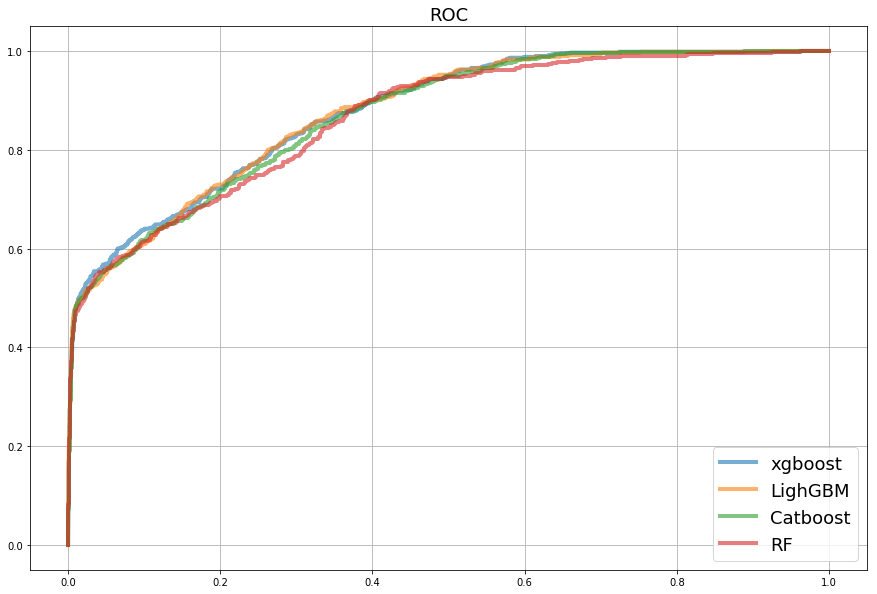

In [5]:
plt.figure(figsize=(15,10))
plt.plot(fpr1, tpr1, linewidth = 4, alpha = 0.6)
plt.plot(fpr2, tpr2, linewidth = 4, alpha = 0.6)
plt.plot(fpr3, tpr3, linewidth = 4, alpha = 0.6)
plt.plot(fpr4, tpr4, linewidth = 4, alpha = 0.6)
plt.legend(['xgboost', 'LighGBM', 'Catboost', 'RF'], loc='lower right', prop={'size': 18})
plt.grid(True)
plt.title("ROC", size = 18)
plt.show()

In [6]:
result_df = pd.DataFrame(columns=["Accuracy", "Recall", "Precision", "10Prec", "AUC"])

In [7]:
models = {
    "xgboost": xgb_results, 
    "LightGBM": lgb_results, 
    "Catboost": cat_results, 
    "RF": rf_results
}

def insert_values(y_true, models):
    result_df = pd.DataFrame(columns=["Accuracy", "Recall", "Precision", "10Prec", "AUC"])
    for key, model in models.items():
        acc, rec, prec = calculate_scores(y_true, model["y_pred"].values)
        prec10, auc = prec_score_10(y_true, model["y_pred_proba"].values)
        result_df.loc[key] = [acc, rec, prec, prec10, auc]
    return result_df

In [8]:
insert_values(y_true, models)

,Accuracy,Recall,Precision,10Prec,AUC
xgboost,0.736875,0.800344,0.189487,0.426966,0.875944
LightGBM,0.927750,0.005164,1.000000,0.411985,0.874345
Catboost,0.783625,0.729776,0.212212,0.413233,0.869772
RF,0.952875,0.445783,0.824841,0.418227,0.863932
